# LATAM - Case Study for monetization Strategy

> Using attached dummy data, please perform an assessment of this business and prepare a set of meeting materials

> Assume this business earns revenue through advertisements shown on a mobile video content platform

### 1. Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mticker

%matplotlib inline

pd.set_option('display.float_format', lambda x: '%.3f' % x)

### 2. Data Processing

In [2]:
# Load the data
df = pd.read_csv('data/latam_data.csv', parse_dates=['date'])

# Define the explicit order for the region column.
order = ['One', 'Two', 'Three', 'Four', 'Five', 'Six', 'Seven', 
         'Eight', 'Nine', 'Ten', 'Eleven', 'Twelve', 'Thirteen', 'Fourteen']

# Convert the 'region' column to an ordered categorical with the defined order.
df['region'] = pd.Categorical(df['region'], categories=order, ordered=True)

# Data Cleaning
missing_values = df.isnull().sum()
print("Missing values per column:\n", missing_values)

Missing values per column:
 date                       0
ad_product_category        0
region                     0
ad_placement               0
industry                   0
impressions                0
cpm                    54516
customer_id                0
account_id              1458
revenue                54516
dtype: int64


In [3]:
df.describe()[['date', 'impressions', 'cpm', 'revenue']]

,date,impressions,cpm,revenue
count,65534,65534.000,11018.000,11018.000
mean,2019-02-07 13:01:43.384502528,192866.175,8.006,6070.122
min,2018-08-19 00:00:00,0.000,0.000,0.000
25%,2018-12-29 00:00:00,0.000,2.453,5.910
50%,2019-02-23 00:00:00,0.000,4.294,73.673
75%,2019-04-03 00:00:00,0.000,8.644,726.643
max,2019-05-03 00:00:00,29058606.000,1224.000,477532.266
std,NaN,1894809.134,21.606,21700.171


### 3. Exploration of data

In [4]:
df_ts = df.groupby('date').agg(
    total_rows=pd.NamedAgg(column='account_id', aggfunc='count'),
    total_impressions=pd.NamedAgg(column='impressions', aggfunc='sum'),
    average_cpm=pd.NamedAgg(column='cpm', aggfunc='mean'),
    total_revenue=pd.NamedAgg(column='revenue', aggfunc='sum')
).reset_index()

# random 5 rows
df_ts.sample(5)

,date,total_rows,total_impressions,average_cpm,total_revenue
66,2018-10-24,103,47178858,6.340,218629.953
183,2019-02-18,372,45593538,10.101,209090.120
14,2018-09-02,104,38292262,5.986,137473.974
15,2018-09-03,97,38357002,4.531,139232.489
120,2018-12-17,191,51339074,7.801,266273.960


In [5]:
# Descriptive Statistics
print("Descriptive statistics for numeric fields:\n", df[['impressions', 'cpm']].describe())

# Grouping by Region and Category
grouped = df.groupby(['region', 'ad_product_category']).agg(
    total_impressions=pd.NamedAgg(column='impressions', aggfunc='sum'),
    average_cpm=pd.NamedAgg(column='cpm', aggfunc='mean'),
    total_revenue=pd.NamedAgg(column='revenue', aggfunc='sum')
).reset_index()
print(grouped.head())

Descriptive statistics for numeric fields:
        impressions       cpm
count    65534.000 11018.000
mean    192866.175     8.006
std    1894809.134    21.606
min          0.000     0.000
25%          0.000     2.453
50%          0.000     4.294
75%          0.000     8.644
max   29058606.000  1224.000
  region ad_product_category  total_impressions  average_cpm  total_revenue
0    One                   A         1143129177       15.154   19436435.007
1    One                   B            3777357       27.484     109244.548
2    One                   C                  0          NaN          0.000
3    Two                   A         6380707180        5.345   29086597.009
4    Two                   B          309985871       24.261    3449442.822


/var/folders/44/8qsj98bj25bdys30p9vvj17m0000gn/T/ipykernel_46540/903875955.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(['region', 'ad_product_category']).agg(


In [6]:
df_pivot = grouped.pivot(
    index='region', 
    columns='ad_product_category', 
    values=['total_impressions', 'average_cpm']
)

# Swap the levels so that the ad_product_category is on top
df_pivot.columns = df_pivot.columns.swaplevel(0, 1)

# Optionally, sort the columns so they're grouped nicely
df_pivot = df_pivot.sort_index(axis=1, level=0).fillna('-')

df_pivot

ad_product_category           A                             B  \
                    average_cpm total_impressions average_cpm   
region                                                          
One                      15.154    1143129177.000      27.484   
Two                       5.345    6380707180.000      24.261   
Three                     7.979      32200358.000      25.824   
Four                      4.814    4557488721.000      21.817   
Five                     30.066        509053.000           -   
Six                           -             0.000       9.664   
Seven                         -             0.000      18.422   
Eight                         -             0.000       4.998   
Nine                          -             0.000      19.654   
Ten                           -             0.000      22.941   
Eleven                        -             0.000      18.981   
Twelve                        -             0.000           -   
Thirteen                      -             0.000           -   
Fourteen                      -             0.000           -   

ad_product_category                             C                    
                    total_impressions average_cpm total_impressions  
region                                                               
One                       3777357.000           -             0.000  
Two                     309985871.000           -             0.000  
Three                    12650154.000           -             0.000  
Four                    164100434.000           -             0.000  
Five                            0.000           -             0.000  
Six                      11376882.000           -             0.000  
Seven                     7234417.000           -             0.000  
Eight                     7365698.000           -             0.000  
Nine                      1926342.000           -             0.000  
Ten                       2359227.000           -             0.000  
Eleven                    4481025.000           -             0.000  
Twelve                          0.000           -             0.000  
Thirteen                        0.000           -             0.000  
Fourteen                        0.000           -             0.000

* regions ['Twelve', 'Thirteen', 'Fourteen'] dont generate any revenue
* product C doesnt generate any revenue

In [7]:
# --- 3. Data Loading and Initial Cleaning ---

print("Original DataFrame Info:")
df.info()
print("\nOriginal DataFrame Shape:", df.shape)

Original DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65534 entries, 0 to 65533
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   date                 65534 non-null  datetime64[ns]
 1   ad_product_category  65534 non-null  object        
 2   region               65534 non-null  category      
 3   ad_placement         65534 non-null  object        
 4   industry             65534 non-null  object        
 5   impressions          65534 non-null  int64         
 6   cpm                  11018 non-null  float64       
 7   customer_id          65534 non-null  object        
 8   account_id           64076 non-null  float64       
 9   revenue              11018 non-null  float64       
dtypes: category(1), datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 4.6+ MB

Original DataFrame Shape: (65534, 10)


In [8]:
# Convert account_id to string and handle NaNs for easier grouping
df['account_id'] = df['account_id'].fillna('Unknown').astype(str)

# Create a dataframe focusing on rows where monetization data exists
df_monetized = df.dropna(subset=['cpm', 'revenue']).copy()
print(f"\nDataFrame shape after dropping rows with missing CPM/Revenue: {df_monetized.shape}")


DataFrame shape after dropping rows with missing CPM/Revenue: (11018, 10)


In [9]:
# For CPM calculations and performance analysis, impressions must be greater than 0
df_perf = df_monetized[df_monetized['impressions'] > 0].copy()
print(f"DataFrame shape after filtering for impressions > 0: {df_perf.shape}")

DataFrame shape after filtering for impressions > 0: (11018, 10)


In [10]:
# Calculate revenue manually to check consistency
df_perf['calculated_revenue'] = (df_perf['impressions'] / 1000) * df_perf['cpm']
# Check if the existing revenue column is close to the calculation
revenue_check = np.isclose(df_perf['revenue'], df_perf['calculated_revenue'])
print(f"\nRevenue column consistent with Impressions*CPM/1000? {revenue_check.all()}")
if not revenue_check.all():
    print(f"WARNING: {sum(~revenue_check)} rows have inconsistent revenue calculations.")
    # Decide whether to use df_perf['revenue'] or df_perf['calculated_revenue']
    # For now, we'll proceed assuming df_perf['revenue'] is the source of truth,
    # but flag this discrepancy.


Revenue column consistent with Impressions*CPM/1000? True


### 4. Plots

In [34]:
# plots config
# --- 1. Style Configuration ---
# Set a clean seaborn style
sns.set_style("whitegrid")
# Further customize plot aesthetics (optional)
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['patch.edgecolor'] = 'black' # Add border to bars


# Function to apply final touches like removing spines
def finalize_plot(ax, title=None, xlabel=None, ylabel=None, despine_left=False, despine_bottom=False):
    """Removes top and right spines, optionally left and bottom, and sets labels/title."""
    sns.despine(ax=ax, top=True, right=True, left=despine_left, bottom=despine_bottom)
    if title:
        ax.set_title(title, fontsize=16, pad=20)
    if xlabel:
        ax.set_xlabel(xlabel, fontsize=12, labelpad=15)
    if ylabel:
        ax.set_ylabel(ylabel, fontsize=12, labelpad=15)
    plt.tight_layout()

    plt.show()

def add_annotations(ax, fmt="{:,.0f}", is_bar=True, offset=0.01):
    """Adds value labels to bars or points on a matplotlib Axes object."""
    if is_bar:
        # For bar plots
        for p in ax.patches:
            # Adjust y position slightly above the bar top
            y_pos = p.get_height() * (1 + offset)
            # Adjust x position to be centered on the bar
            x_pos = p.get_x() + p.get_width() / 2.
            # Format and add text
            label = fmt.format(p.get_height())
            if p.get_height() > 0: # Only annotate non-zero bars
                ax.text(x_pos, y_pos, label, ha='center', va='bottom', fontsize=9)
    else:
        # For line plots or scatter plots (adapting might be needed)
        # This is a basic example for line plots, might need adjustment
        for line in ax.get_lines():
            x_data, y_data = line.get_data()
            # Annotate maybe the last point or significant points
            if len(x_data) > 0 and len(y_data) > 0:
                 # Annotate last point as an example
                 label = fmt.format(y_data[-1])
                 ax.text(x_data[-1], y_data[-1]*(1 + offset*2), label, ha='center', va='bottom', fontsize=9)



In [37]:
def plot_time_trends(data, date_col, value_col, agg_func='sum', freq='W',
                     group_by=None, title=None, xlabel='Date', ylabel=None,
                     use_annot=False, annot_fmt="{:,.0f}", show_moving_avg=False):
    """Plots aggregated time trends, optionally grouped by a category.
    
    Parameters:
    -----------
    show_moving_avg : bool, optional
        If True, adds a 4-week moving average line to the plot
    """
    if ylabel is None:
        ylabel = f"{agg_func.capitalize()} of {value_col.replace('_', ' ').title()}"
    if title is None:
        title = f"Time Trend ({freq}) of {ylabel}"
        if group_by:
            title += f" by {group_by.replace('_', ' ').title()}"

    # Set date as index for resampling
    data_ts = data.set_index(date_col)

    if group_by:
        # Group by the categorical column and resample/aggregate
        agg_data = data_ts.groupby(group_by)[value_col].resample(freq).agg(agg_func).reset_index()
        # Plot using seaborn lineplot with hue
        fig, ax = plt.subplots()
        sns.lineplot(data=agg_data, x=date_col, y=value_col, hue=group_by, ax=ax)
        ax.legend(title=group_by.replace('_', ' ').title(), bbox_to_anchor=(1.05, 1), loc='upper left')
        
        # Add moving average for each group if requested
        if show_moving_avg:
            for group in agg_data[group_by].unique():
                group_data = agg_data[agg_data[group_by] == group]
                ma = group_data[value_col].rolling(window=4, min_periods=1).mean()
                ax.plot(group_data[date_col], ma, '--', alpha=0.5, label=f'{group} (4W MA)')
    else:
        # Resample and aggregate directly
        agg_data = data_ts[value_col].resample(freq).agg(agg_func).reset_index()
        # Plot using seaborn lineplot
        fig, ax = plt.subplots()
        sns.lineplot(data=agg_data, x=date_col, y=value_col, ax=ax)
        
        # Add moving average if requested
        if show_moving_avg:
            ma = agg_data[value_col].rolling(window=4, min_periods=1).mean()
            ax.plot(agg_data[date_col], ma, '--', label='4-Week Moving Average')

    # Add annotations if requested (might be cluttered on dense time series)
    if use_annot and not group_by: # Annotation simpler for single lines for now
         add_annotations(ax, fmt=annot_fmt, is_bar=False, offset=0.02)

    finalize_plot(ax, title=title, xlabel=xlabel, ylabel=ylabel)

In [26]:
def plot_categorical_distribution(data, cat_col, value_col, agg_func='sum',
                                  hue=None, top_n=15, title=None, xlabel=None,
                                  ylabel=None, use_annot=True, annot_fmt="{:,.0f}",
                                  filter_dict=None):
    """Plots aggregated distribution for a categorical variable, optionally filtered and with hue."""

    # Apply filters if provided
    filtered_data = data.copy()
    if filter_dict:
        for col, values in filter_dict.items():
            if isinstance(values, list):
                filtered_data = filtered_data[filtered_data[col].isin(values)]
            else:
                filtered_data = filtered_data[filtered_data[col] == values]
        print(f"Plotting with filters applied: {filter_dict}. Resulting shape: {filtered_data.shape}")
        if filtered_data.empty:
            print("Warning: Filter resulted in empty data.")
            return

    if filtered_data.empty:
         print(f"Warning: No data available for plotting {cat_col} vs {value_col}.")
         return


    group_cols = [cat_col]
    if hue:
        group_cols.append(hue)

    # Group data and aggregate
    agg_data = filtered_data.groupby(group_cols)[value_col].agg(agg_func).reset_index()

    # Handle potential division by zero for mean if impressions are zero (already filtered in df_perf)
    if agg_func == 'mean' and value_col == 'cpm':
         # Recalculate weighted mean CPM = Sum(Revenue) / (Sum(Impressions)/1000)
         rev_imp = filtered_data.groupby(group_cols)[['revenue', 'impressions']].sum()
         rev_imp['weighted_cpm'] = (rev_imp['revenue'] / (rev_imp['impressions'] / 1000)).fillna(0)
         agg_data = rev_imp[['weighted_cpm']].reset_index().rename(columns={'weighted_cpm': value_col})


    # Sort and get top N if applicable (based on the value column)
    # Sort aggregated values first, then maybe by category name if needed
    agg_data = agg_data.sort_values(by=value_col, ascending=False)

    # Get Top N categories based on the primary categorical column
    if top_n and agg_data[cat_col].nunique() > top_n:
        top_categories = agg_data.groupby(cat_col)[value_col].sum().nlargest(top_n).index
        agg_data = agg_data[agg_data[cat_col].isin(top_categories)]


    # Default labels and title
    if xlabel is None:
        xlabel = cat_col.replace('_', ' ').title()
    if ylabel is None:
        ylabel = f"{agg_func.capitalize()} of {value_col.replace('_', ' ').title()}"
    if title is None:
        title = f"{ylabel} by {xlabel}"
        if hue:
             title += f" and {hue.replace('_', ' ').title()}"
        if filter_dict:
            title += f" (Filtered)"


    # Plotting
    fig, ax = plt.subplots()
    # Determine order for plotting based on sorted aggregated data
    plot_order = agg_data.groupby(cat_col)[value_col].sum().sort_values(ascending=False).index if not hue else None

    # Use catplot for easier handling of hue and kind='bar'
    # sns.catplot(data=agg_data, x=cat_col, y=value_col, hue=hue, kind="bar", ax=ax, order=plot_order, errorbar=None)
    # Using barplot directly gives more control over the Axes object
    sns.barplot(
        data=agg_data,
        x=cat_col, 
        y=value_col, 
        hue=hue, 
        ax=ax, 
        order=plot_order, 
        errorbar=None, 
        estimator=agg_func if hue else None
    ) #estimator matters if hue splits groups further

    # Add annotations
    if use_annot:
        try:
            # Adjust format based on aggregation
            if agg_func == 'mean' or value_col == 'cpm':
                fmt = "{:,.2f}" # Use 2 decimal places for means/CPM
            else:
                fmt = annot_fmt # Use default/provided format for sums/counts
            add_annotations(ax, fmt=fmt, is_bar=True)
        except Exception as e:
            print(f"Could not add annotations: {e}")


    # Formatting
    ax.tick_params(axis='x', rotation=45, ha='right')
    if value_col == 'revenue' or agg_func == 'sum': # Format y-axis for large numbers (Revenue/Impressions Sum)
        ax.yaxis.set_major_formatter(mticker.FuncFormatter(
            lambda x, pos: f'{x/1e6:,.1f}M' if x >= 1e6 else f'{x/1e3:,.0f}K' if x >= 1e3 else f'{x:,.0f}'
        ))
    elif value_col == 'cpm': # Format y-axis as currency for CPM
        ax.yaxis.set_major_formatter(mticker.FormatStrFormatter('$%.2f'))

    if hue:
        ax.legend(title=hue.replace('_', ' ').title(), bbox_to_anchor=(1.05, 1), loc='upper left')

    finalize_plot(ax, title=title, xlabel=xlabel, ylabel=ylabel)

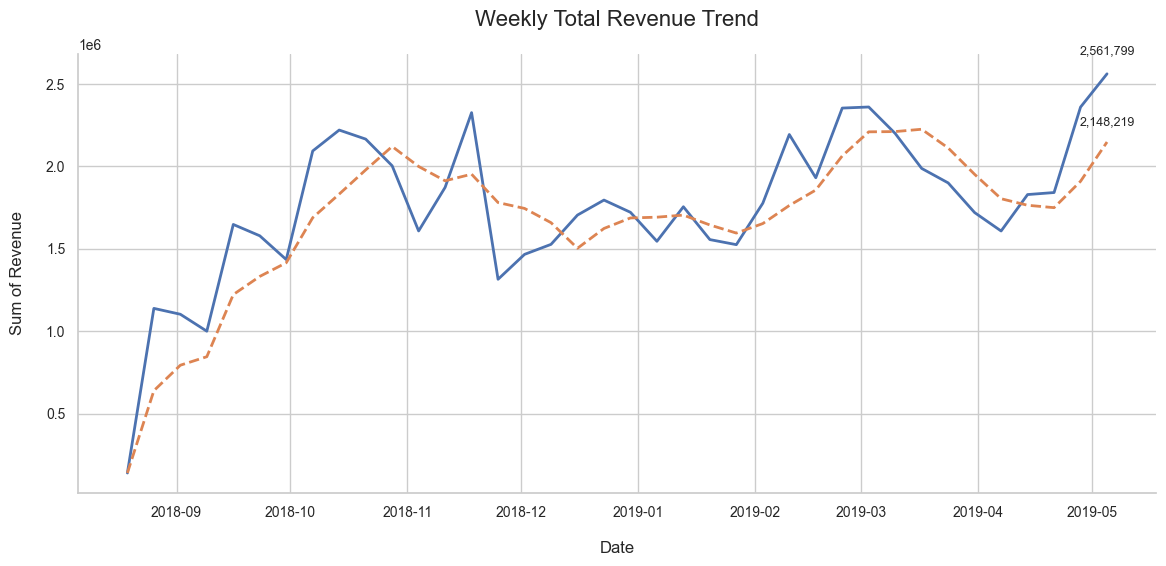

In [39]:

plot_time_trends(df_perf, 'date', 'revenue', agg_func='sum', freq='W', title='Weekly Total Revenue Trend', use_annot=True, show_moving_avg=True)


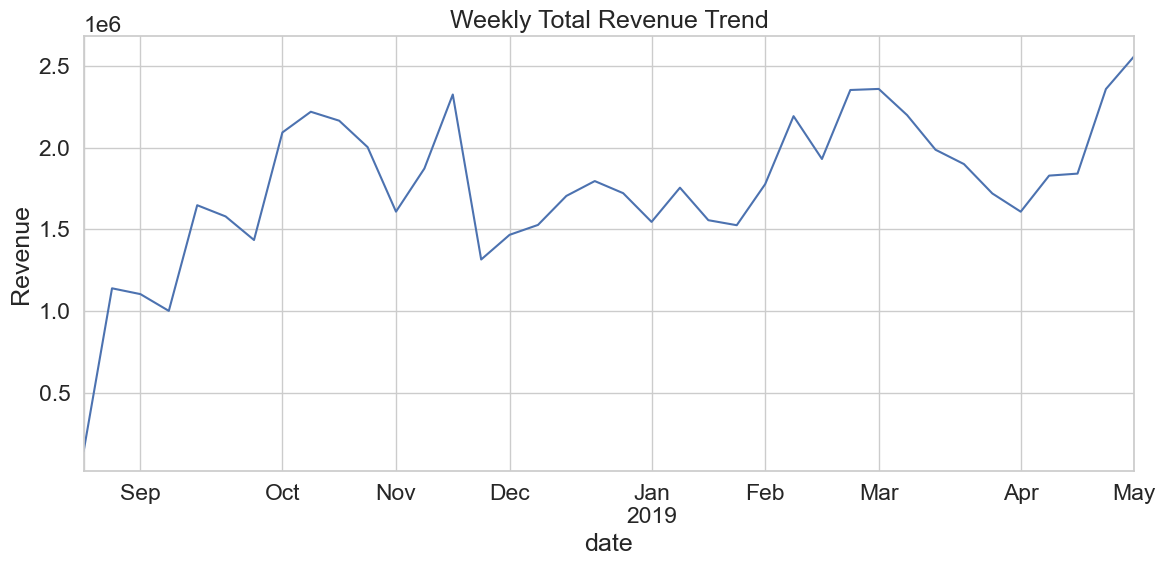

In [32]:
# Create a new figure explicitly
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111)

# Plot directly using pandas
weekly_revenue = df_perf.set_index('date')['revenue'].resample('W').sum()
weekly_revenue.plot(ax=ax)
ax.set_title('Weekly Total Revenue Trend')
ax.set_ylabel('Revenue')
plt.tight_layout()
plt.show()

In [29]:
print("DataFrame info:")
print(df_perf.info())
print("\nFirst few rows:")
print(df_perf.head())

DataFrame info:
<class 'pandas.core.frame.DataFrame'>
Index: 11018 entries, 0 to 65529
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   date                 11018 non-null  datetime64[ns]
 1   ad_product_category  11018 non-null  object        
 2   region               11018 non-null  category      
 3   ad_placement         11018 non-null  object        
 4   industry             11018 non-null  object        
 5   impressions          11018 non-null  int64         
 6   cpm                  11018 non-null  float64       
 7   customer_id          11018 non-null  object        
 8   account_id           11018 non-null  object        
 9   revenue              11018 non-null  float64       
 10  calculated_revenue   11018 non-null  float64       
dtypes: category(1), datetime64[ns](1), float64(3), int64(1), object(5)
memory usage: 958.3+ KB
None

First few rows:
        date ad_produ

----